In [ ]:
import pandas as pd
from scipy.io import arff
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
A,b = fetch_openml("credit-g", version=1, as_frame=True, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
base = Path("/content/drive/MyDrive/Applied_ML/Class_4/Assignment")

In [ ]:
custom_function_folder = base/"Custom_function"

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Applied_ML/Class_4/Assignment/Custom_functions',
 '/content/drive/MyDrive/Applied_ML/Class_4/Assignment/Custom_function']

In [ ]:
sys.path.append(str(custom_function_folder))

In [ ]:
from eda_plots import diagnostic_plots, plot_target_by_category

In [ ]:
A.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [ ]:
A.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [ ]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [ ]:
A.isnull().any()

checking_status           False
duration                  False
credit_history            False
purpose                   False
credit_amount             False
savings_status            False
employment                False
installment_commitment    False
personal_status           False
other_parties             False
residence_since           False
property_magnitude        False
age                       False
other_payment_plans       False
housing                   False
existing_credits          False
job                       False
num_dependents            False
own_telephone             False
foreign_worker            False
dtype: bool

In [ ]:
A.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
dtype: int64

In [ ]:
A.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [ ]:
categorical_1 = [var for var in A.columns if A[var].dtype == "category"]
discrete_1 = [var for var in A.columns if A[var].dtype != "category" and (len(A[var].unique())< 20)]
continous_1 = [ var for var in A.columns if A[var].dtype != 'category'
              and var not in discrete]

In [ ]:
continous_1

['duration', 'credit_amount', 'age']

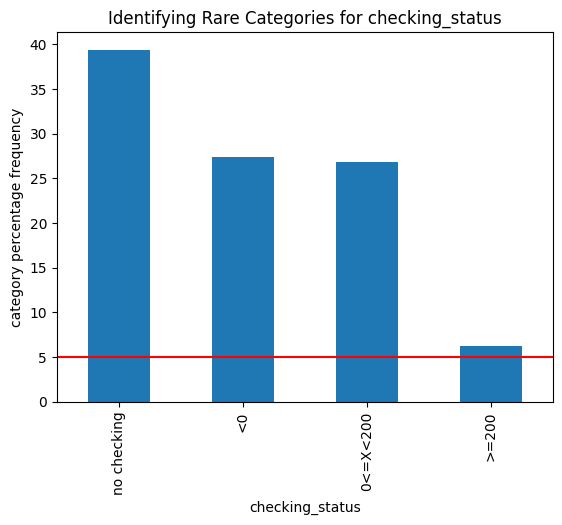

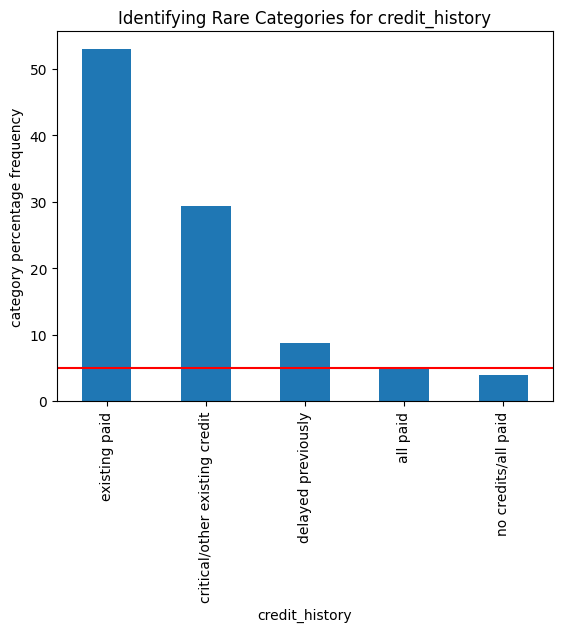

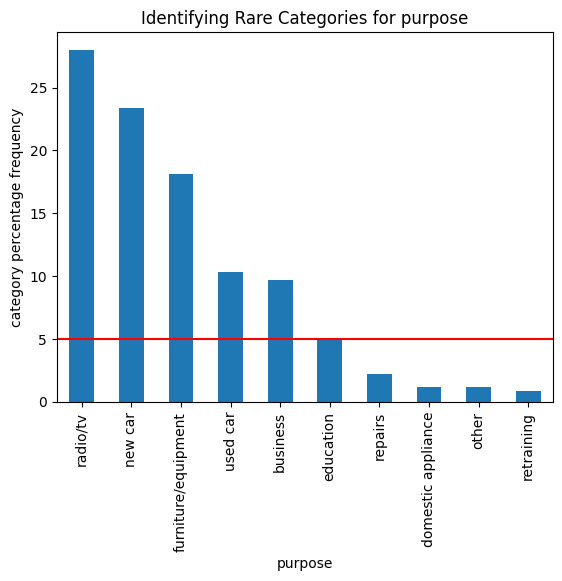

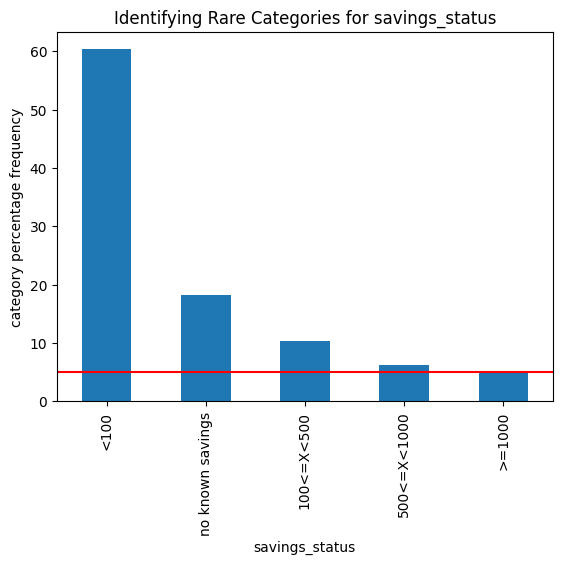

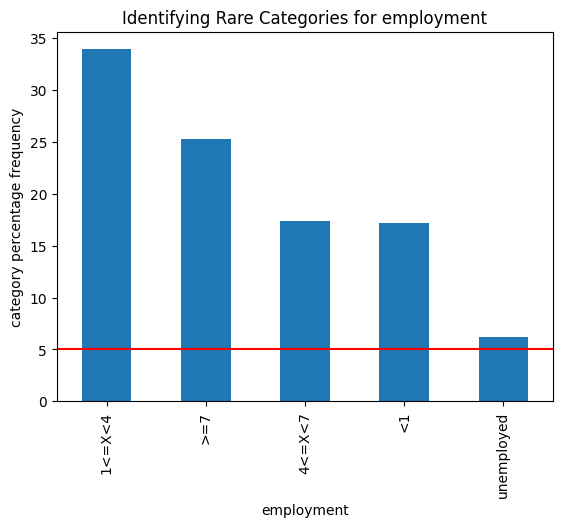

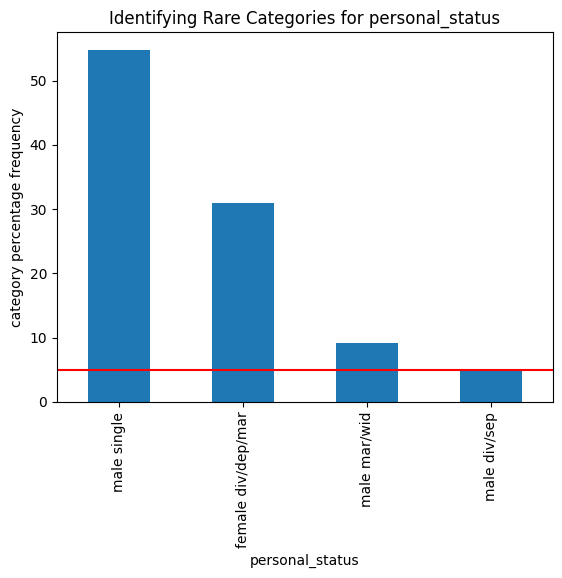

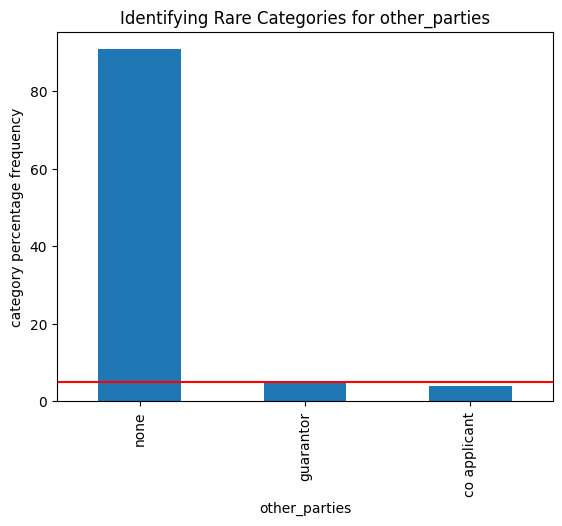

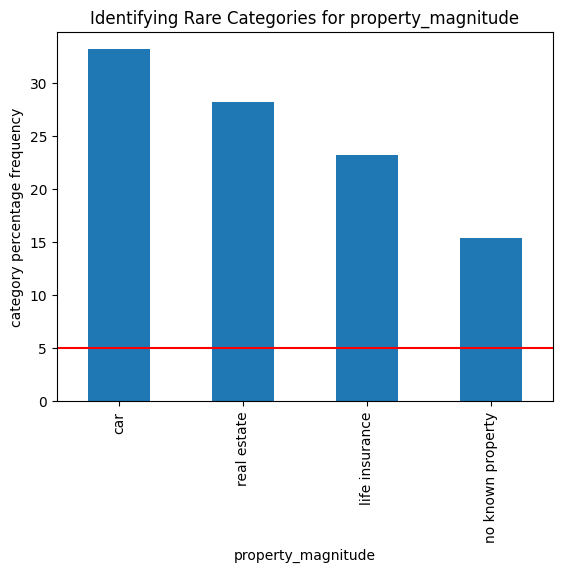

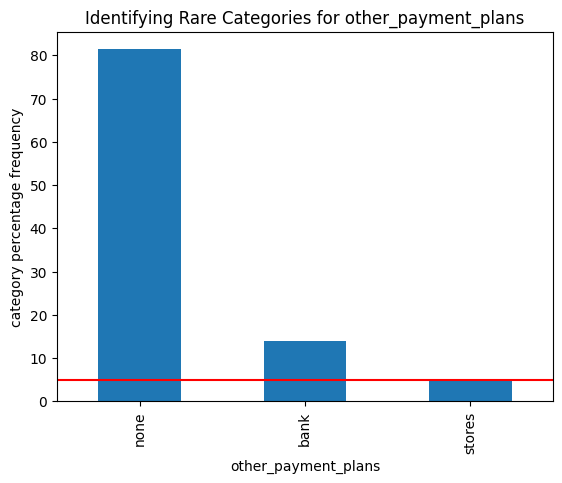

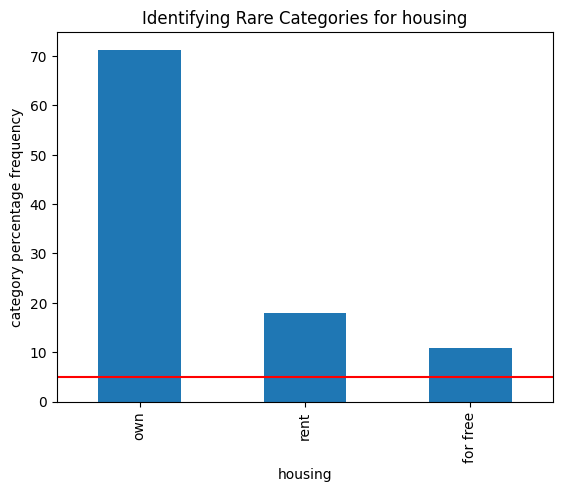

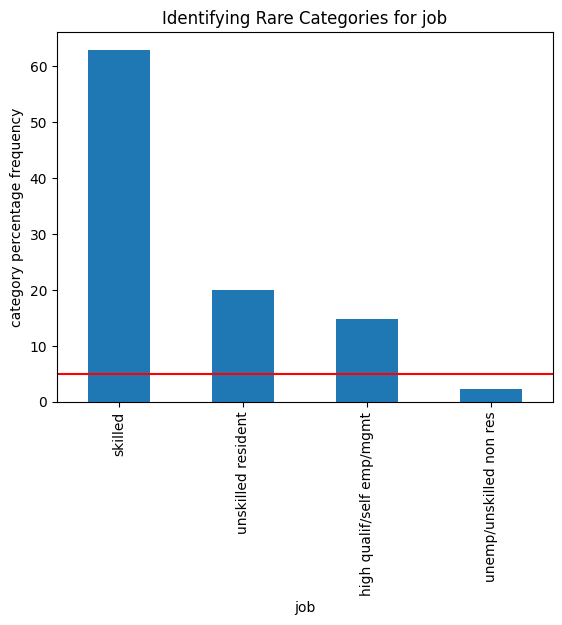

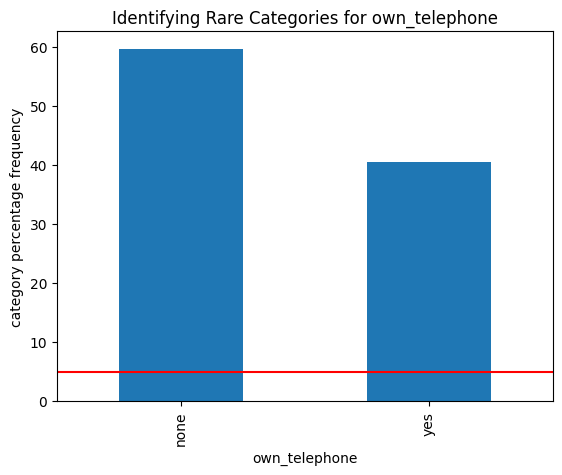

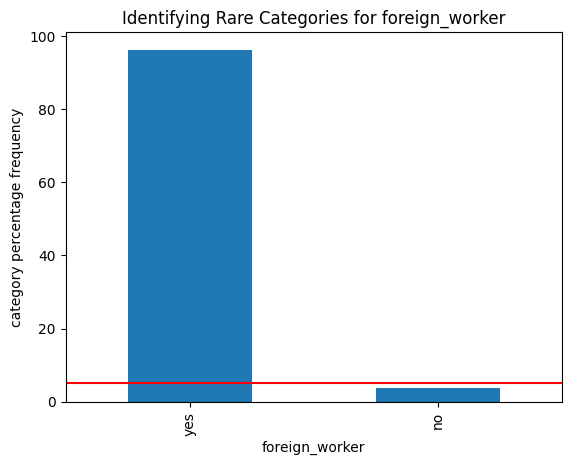

In [ ]:
def check_rare(df,var):
  cat_freq = 100 * df[var].value_counts(normalize = True)
  fig = cat_freq.sort_values(ascending=False).plot.bar()
  fig.axhline(y=5, color='red')
  fig.set_ylabel('category percentage frequency')
  fig.set_xlabel(var)
  fig.set_title(f'Identifying Rare Categories for {var}')
  plt.show()

for var in categorical_1:
  rare(A,var)

<Axes: >

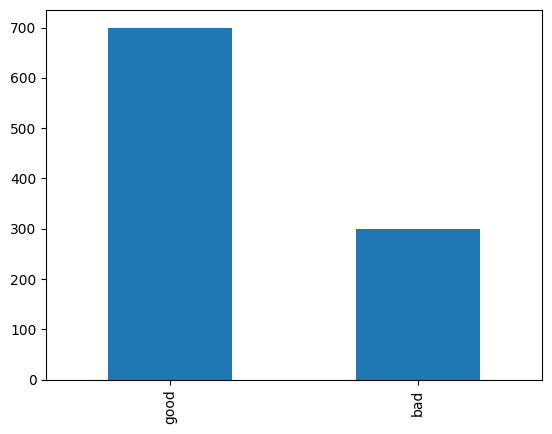

In [ ]:
b.value_counts().plot.bar()

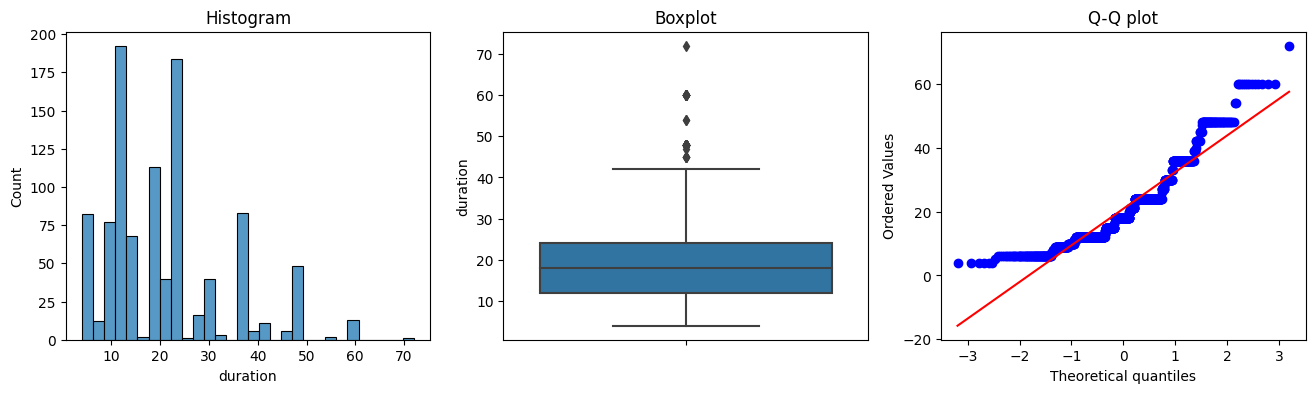

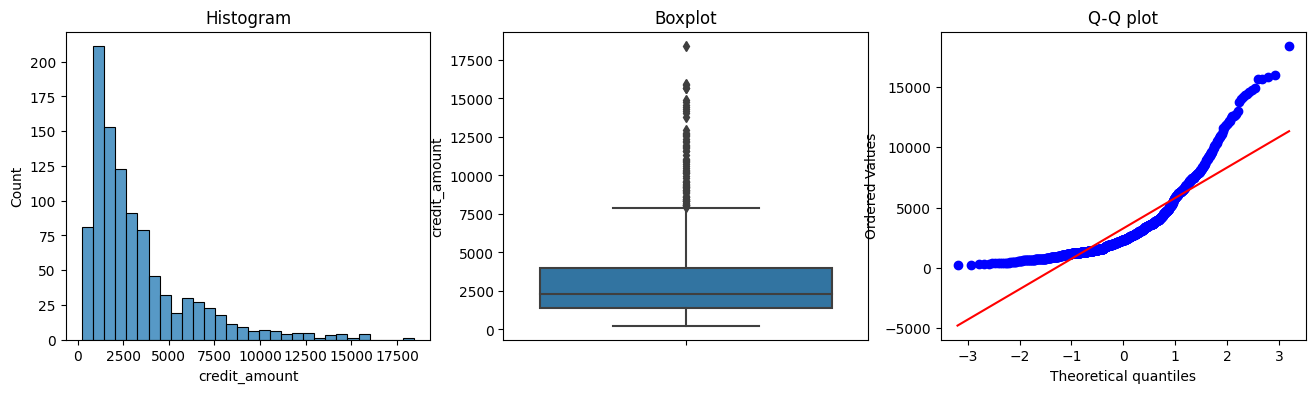

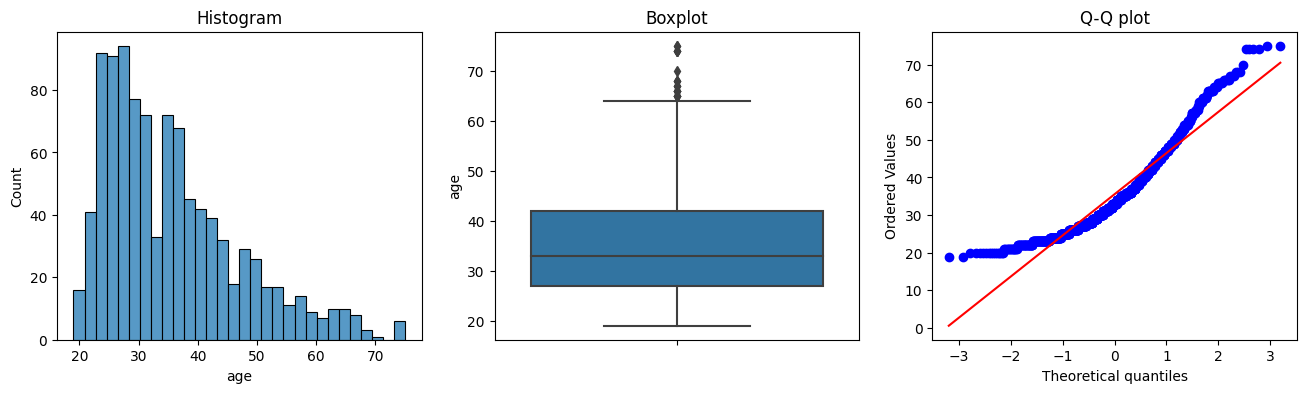

In [ ]:
for var in continous_1:
    diagnostic_plots(A, var)


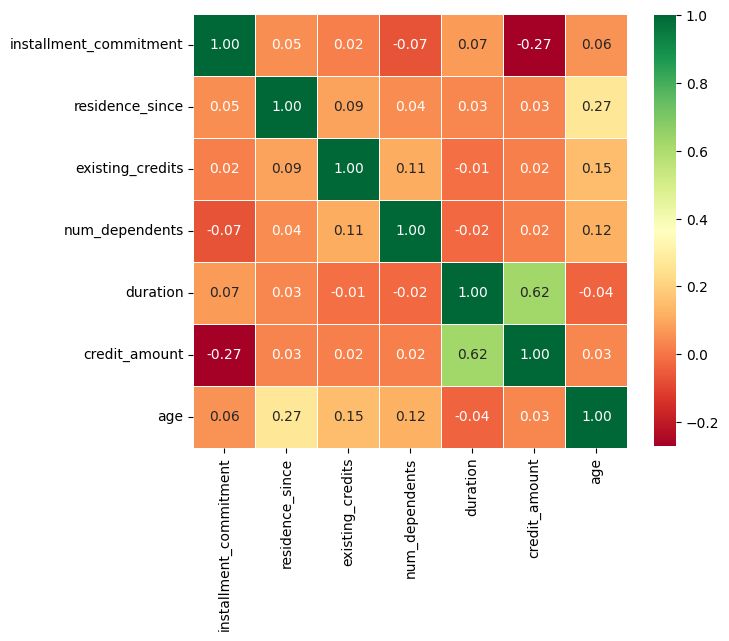

In [ ]:
corrmat = A[discrete_1 + continous_1].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(A[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

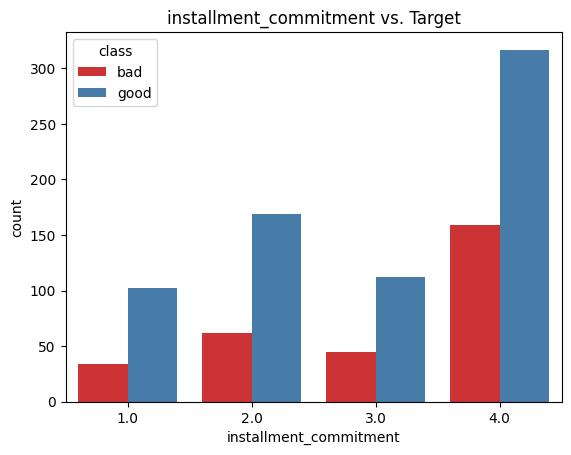

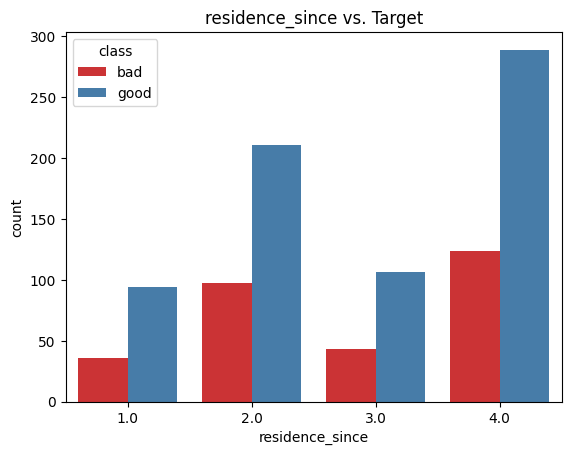

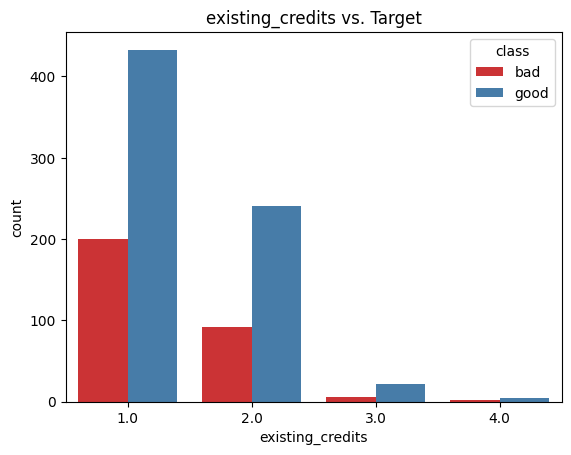

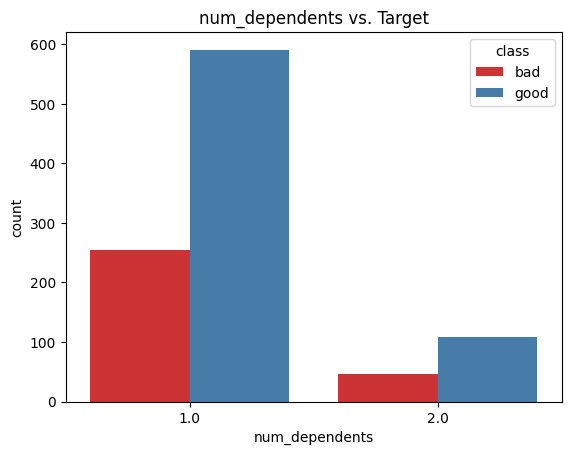

In [ ]:
for var in categorical_1 and discrete_1:
    sns.countplot(x=var, hue=b, data=A, palette="Set1")
    plt.title(f"{var} vs. Target")
    plt.show()

In [ ]:
A_train,A_test,b_train,b_test= train_test_split(A,b,test_size=0.33,random_state=0)

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin

class ConvertToNumpyArray(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self, X):
        return np.array(X)

In [ ]:
rare_labels_1 = ["foreign_worker","purpose"]
columns_to_transform_1 = ["age","credit_amount","duration"]


In [ ]:
EDA_credit = Pipeline([
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels_1,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical_1,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform_1)),
    ('scaler',MinMaxScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('log',LogisticRegression())
])

In [ ]:
param_log = {"log__C":[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log = GridSearchCV(EDA_credit,param_log,cv=6,return_train_score=True)

In [ ]:
grid_log.fit(A_train,b_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['foreign_worker',
                                                                    'purpose'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['checking_status',
                                                                 'credit_history',
                                                                 'purpose',
                                                                 'savings_status',
                                                                 'employment',
                                                                 'personal_status',
                                                                 'other_parties',
                                                                 'property_magnitude',
                                                                 'other_payment_plans',
                                                                 'housing',
                                                                 'job',
                                                                 'own_telephone',
                                                                 'foreign_worker'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['age',
                                                                         'credit_amount',
                                                                         'duration'])),
                                       ('scaler', MinMaxScaler()),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('log', LogisticRegression())]),
             param_grid={'log__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [ ]:
print(f"best param is : {grid_log.best_params_}")
print(f"CV score is : {grid_log.best_score_}")

best param is : {'log__C': 0.1}
CV score is : 0.7272727272727274


In [ ]:
print(f"training score ; {grid_log.score(A_train,b_train)}")
print(f"test score: {grid_log.score(A_test,b_test)}")

training score ; 0.7223880597014926
test score: 0.7818181818181819


In [ ]:

EDA_credit_2 = Pipeline([
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels_1,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical_1,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform_1)),
    ('scaler',MaxAbsScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('log',LogisticRegression())
])

In [ ]:
param_log_2 = {"log__C":[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_2 = GridSearchCV(EDA_credit_2,param_log_2,cv=6,return_train_score=True)

In [ ]:
grid_log_2.fit(A_train,b_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['foreign_worker',
                                                                    'purpose'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['checking_status',
                                                                 'credit_history',
                                                                 'purpose',
                                                                 'savings_status',
                                                                 'employment',
                                                                 'personal_status',
                                                                 'other_parties',
                                                                 'property_magnitude',
                                                                 'other_payment_plans',
                                                                 'housing',
                                                                 'job',
                                                                 'own_telephone',
                                                                 'foreign_worker'])),
                                       ('log_transformer',
                                        LogTransformer(variables=['age',
                                                                  'credit_amount',
                                                                  'duration'])),
                                       ('scaler', MaxAbsScaler()),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('log', LogisticRegression())]),
             param_grid={'log__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [ ]:
print(f"best param is : {grid_log_2.best_params_}")
print(f"CV score is : {grid_log_2.best_score_}")

best param is : {'log__C': 1}
CV score is : 0.7597463534963534


In [ ]:

EDA_credit_3 = Pipeline([
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels_1,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical_1,ignore_format = True)),
    ('log_transformer',LogTransformer(variables=columns_to_transform_1)),
    ('scaler',MaxAbsScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('log',LogisticRegression())
])

In [ ]:
param_log_3 = {"log__C":[1, 10, 100, 1000]}
grid_log_3 = GridSearchCV(EDA_credit_3,param_log_2,cv=6,return_train_score=True)

In [ ]:
grid_log_3.fit(A_train,b_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['foreign_worker',
                                                                    'purpose'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['checking_status',
                                                                 'credit_history',
                                                                 'purpose',
                                                                 'savings_status',
                                                                 'employment',
                                                                 'personal_status',
                                                                 'other_parties',
                                                                 'property_magnitude',
                                                                 'other_payment_plans',
                                                                 'housing',
                                                                 'job',
                                                                 'own_telephone',
                                                                 'foreign_worker'])),
                                       ('log_transformer',
                                        LogTransformer(variables=['age',
                                                                  'credit_amount',
                                                                  'duration'])),
                                       ('scaler', MaxAbsScaler()),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('log', LogisticRegression())]),
             param_grid={'log__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [ ]:
print(f"best param is : {grid_log_3.best_params_}")
print(f"CV score is : {grid_log_3.best_score_}")

best param is : {'log__C': 1}
CV score is : 0.7597463534963534



-  Compare KNN (last HW) and Linear Regression. Basd on your anaysis which algorithm you will recommend.
- The aim of the piepline is to predict the rented bike count.


In [ ]:
"""Importing the required packages"""
!pip install feature_engine -qq

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# save and load models
import joblib

# Pathlib to navigate file system
from pathlib import Path
import sys

# For splitting the dataset
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropFeatures

# For categorical variables
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import RareLabelEncoder

# For scaling the data
from sklearn.preprocessing import StandardScaler

# creating pipelines
from sklearn.pipeline import Pipeline

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Using KNN classification for our data
from sklearn.neighbors import KNeighborsClassifier

# draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# We will use this to download the Dataset
from sklearn.datasets import fetch_openml

# feature engine log transformation
from feature_engine.transformation import LogTransformer

# feature engine wrapper
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Applied_ML/Class_4/Assignment/Datasets/SeoulBikeData.csv", encoding='latin-1')

In [ ]:
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
categorical = [var for var in df.columns if df[var].dtype == "O" and var not in ["Rented Bike Count"]]
discrete = [var for var in df.columns if df[var].dtype != "O" and len(df[var].unique() < 20) and var not in ["Rented Bike Count"]]
continuous = [var for var in df.columns if df[var].dtype != "O" and var not in discrete and var not in ["Rented Bike Count"]]

In [ ]:
X = df.drop(['Rented Bike Count'], axis=1)
y = df["Rented Bike Count"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.33)


In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin

class ConvertToNumpyArray(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self, X):
        return np.array(X)

In [ ]:
columns_to_drop = ['Dew point temperature(°C)']
columns_to_transform = ['Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)','Hour','Solar Radiation (MJ/m2)']
columns_to_scale = ['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']
rare_labels =['Functioning Day']

In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.selection.drop_correlated_features import Variables


EDA = Pipeline([
    ('drop_features',DropFeatures(columns_to_drop)),
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform)),
    ('scaler',MinMaxScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('knn',KNeighborsRegressor())
])

In [ ]:
param_1 = {'knn__n_neighbors': np.arange(1,11,1)}
grid_knn = GridSearchCV(EDA,param_grid=param_1, cv= 5 , return_train_score=True)


In [ ]:
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Date',
                                                                 'Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('scaler', MinMaxScaler()),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             return_train_score=True)

In [ ]:
grid_knn.best_score_

0.6840493055684189

In [ ]:
grid_knn.score(X_test,y_test)

0.7253279403212198

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV


In [ ]:
EDA_regression = Pipeline([
    ('drop_features',DropFeatures(columns_to_drop)),
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform)),
    ('scaler',MinMaxScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('lr',LinearRegression())
])

In [ ]:
EDA_regression.fit(X_train,y_train)

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['Dew point temperature(°C)'])),
                ('rare_label_encoder',
                 RareLabelEncoder(ignore_format=True, n_categories=1,
                                  variables=['Functioning Day'])),
                ('one_hot_encoder',
                 OneHotEncoder(ignore_format=True,
                               variables=['Date', 'Seasons', 'Holiday',
                                          'Functioning Day'])),
                ('yj_transformer',
                 YeoJohnsonTransformer(variables=['Wind speed (m/s)',
                                                  'Rainfall(mm)',
                                                  'Snowfall (cm)', 'Hour',
                                                  'Solar Radiation (MJ/m2)'])),
                ('scaler', MinMaxScaler()),
                ('array_conversion', ConvertToNumpyArray()),
                ('lr', LinearRegression())])

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
X_train_preds = EDA_regression.predict(X_train)
X_test_preds = EDA_regression.predict(X_test)
print(f'train mse: {mean_squared_error(y_train, X_train_preds)}')
print(f'train rmse: {sqrt(mean_squared_error(y_train, X_train_preds))}')
print(f'train r2: {r2_score(y_train, X_train_preds)}')
print(f'test mse: {mean_squared_error(y_test, X_test_preds)}')
print(f'test rmse: {sqrt(mean_squared_error(y_test, X_test_preds))}')
print(f'test r2: {r2_score(y_test, X_test_preds)}')
scores = cross_val_score(EDA_regression, X_train, y_train,cv=5)
print(scores.mean())


train mse: 138977.17788379622
train rmse: 372.7964295480795
train r2: 0.6691124375888777
test mse: 154107.2361639571
test rmse: 392.5649451542472
test r2: 0.6219408692476289
0.6181665932497576


Let me try with SGD regressor

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
EDA_SGDregression = Pipeline([
    ('drop_features',DropFeatures(columns_to_drop)),
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform)),
    ('scaler',MinMaxScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('SGD', SGDRegressor(max_iter = 1000, tol = 1e-6))
])

In [ ]:
param_sgd = {"SGD__eta0":[0.01, 0.05, 0.1 ,0.5]}

grid_sgd = GridSearchCV(EDA_SGDregression,param_sgd,cv= 6, return_train_score =True, scoring="neg_mean_absolute_error")

In [ ]:
grid_sgd.fit(X_train,y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Date',
                                                                 'Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('scaler', MinMaxScaler()),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('SGD', SGDRegressor(tol=1e-06))]),
             param_grid={'SGD__eta0': [0.01, 0.05, 0.1, 0.5]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
X_train_preds_sgd = grid_sgd.predict(X_train)
X_test_preds_sgd = grid_sgd.predict(X_test)
print(f"train mse:  {mean_squared_error(y_train,X_train_preds_sgd)}")
print(f"train rmse : {sqrt(mean_squared_error(y_train,X_train_preds_sgd))}")
print(f"train r2: {r2_score(y_train,X_train_preds_sgd)}")
print(f"test mse : {mean_squared_error(y_test,X_test_preds_sgd)}")
print(f"test rsme : {sqrt(mean_squared_error(y_test,X_test_preds_sgd))}")
print(f"test r2: {r2_score(y_test,X_test_preds_sgd)}")


train mse:  143242.5688134757
train rmse : 378.4740001816184
train r2: 0.6589570665492366
test mse : 155250.90518865103
test rsme : 394.01891476000367
test r2: 0.6191351962104188


Lets Try with Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:

EDA_Poly = Pipeline([
    ('drop_features',DropFeatures(columns_to_drop)),
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform)),
    ('Poly', PolynomialFeatures()),
    ('scaler',MinMaxScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('lr', LinearRegression())
])

In [ ]:
param_poly = {"Poly__degree":range(1,3)}
grid_poly = GridSearchCV(EDA_Poly,param_poly,cv= 6,n_jobs=1, return_train_score=True)

In [ ]:
grid_poly.fit(X_train,y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Date',
                                                                 'Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('Poly', PolynomialFeatures()),
                                       ('scaler', MinMaxScaler()),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('lr', LinearRegression())]),
             n_jobs=1, param_grid={'Poly__degree': range(1, 3)},
             return_train_score=True)

In [ ]:
X_train_preds_poly = grid_poly.predict(X_train)
X_test_preds_poly = grid_poly.predict(X_test)
print(f"train mse:  {mean_squared_error(y_train,X_train_preds_poly)}")
print(f"train rmse : {sqrt(mean_squared_error(y_train,X_train_preds_poly))}")
print(f"train r2: {r2_score(y_train,X_train_preds_poly)}")
print(f"test mse : {mean_squared_error(y_test,X_test_preds_poly)}")
print(f"test rsme : {sqrt(mean_squared_error(y_test,X_test_preds_poly))}")
print(f"test r2: {r2_score(y_test,X_test_preds_poly)}")

train mse:  139210.3794513546
train rmse : 373.1090717891413
train r2: 0.6685572133469209
test mse : 154520.6243514355
test rsme : 393.09111456688447
test r2: 0.6209267366039476


Trying Lasso

In [ ]:

EDA_lasso = Pipeline([
    ('drop_features',DropFeatures(columns_to_drop)),
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform)),
    ('Poly', PolynomialFeatures()),
    ('scaler',MinMaxScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('lasso', Lasso(max_iter=1000,tol=1e-06))
])

In [ ]:
param_lasso = {'lasso__alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
grid_lasso = GridSearchCV(EDA_lasso,param_lasso,cv=6,return_train_score = True)


In [ ]:
grid_lasso.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.570e+07, tolerance: 2.060e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.723e+07, tolerance: 2.052e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.871e+07, tolerance: 2.092e

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Date',
                                                                 'Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('Poly', PolynomialFeatures()),
                                       ('scaler', MinMaxScaler()),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('lasso', Lasso(tol=1e-06))]),
             param_grid={'lasso__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                          10]},
             return_train_score=True)

In [ ]:
print(f"Lasso training Score : {grid_lasso.best_score_}")
print(f"Lasso best paramenter : {grid_lasso.best_params_}")

Lasso training Score : 0.7724355338426657
Lasso best paramenter : {'lasso__alpha': 0.1}


Trying Ridge Regression

In [ ]:
EDA_Ridge = Pipeline([
    ('drop_features',DropFeatures(columns_to_drop)),
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform)),
    ('Poly', PolynomialFeatures()),
    ('scaler',MinMaxScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('ridge', Ridge())
])

In [ ]:
params_ridge = {"ridge__alpha":[0.001, 0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(EDA_Ridge,params_ridge, cv= 6, return_train_score=True)

In [ ]:
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['Dew '
                                                                       'point '
                                                                       'temperature(°C)'])),
                                       ('rare_label_encoder',
                                        RareLabelEncoder(ignore_format=True,
                                                         n_categories=1,
                                                         variables=['Functioning '
                                                                    'Day'])),
                                       ('one_hot_encoder',
                                        OneHotEncoder(ignore_format=True,
                                                      variables=['Date',
                                                                 'Seasons',
                                                                 'Holiday',
                                                                 'Functioning '
                                                                 'Day'])),
                                       ('yj_transformer',
                                        YeoJohnsonTransformer(variables=['Wind '
                                                                         'speed '
                                                                         '(m/s)',
                                                                         'Rainfall(mm)',
                                                                         'Snowfall '
                                                                         '(cm)',
                                                                         'Hour',
                                                                         'Solar '
                                                                         'Radiation '
                                                                         '(MJ/m2)'])),
                                       ('Poly', PolynomialFeatures()),
                                       ('scaler', MinMaxScaler()),
                                       ('array_conversion',
                                        ConvertToNumpyArray()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [ ]:
print(f"Best params: {grid_ridge.best_params_}")
print(f"Best score: {grid_ridge.best_score_}")

Best params: {'ridge__alpha': 1}
Best score: 0.7780464275482287


#Ridge Regression gives me the Best result than KNN